# K-means clustering on the Driver's dataset

## Background
The biggest supplier of batteries for e-vehicles is Lithionpower. It offers leasing batteries to owners of electric vehicles. Drivers often hire batteries for one day, returning them with a fully charged battery from the business. Based on a driver's past driving behaviour, Lithionpower uses a variable pricing mechanism. Because a battery's lifespan is affected by things like excessive speeding, daily mileage, etc. 
### Task:
The goal is to develop a clusters as a machine learning specialist so that drivers can be grouped together according to driving data.

* <b>id:</b> Unique Id of the driver
* <b>mean_dist_day:</b> Mean distance driven by driver per day
* <b>mean_over_speed_perc:</b> Mean percentage of time a driver was > 5 mph over the speed limit

## Import libraries

In [1]:
import pandas as pd # This import pandas liabrary for dataframe manipulation
import numpy as np # This imports numpy liabrary to work with numbyers and arrays
import matplotlib.pyplot as plt # THis imports pyplot from matplotlib liabrary for data visualization 
import seaborn as sns # This import seaborn for EDA visualization
import warnings
warnings.filterwarnings('ignore') # This supresses the warning due to version diffrences 

## Load dataset..

In [2]:
driver = pd.read_csv("driver-data.csv")

In [3]:
driver.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
driver.shape

(4000, 3)

In [5]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
driver.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [7]:
driver.duplicated().sum()

0

## Statistical-Analysis

In [8]:
driver.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


As shown in the statistical analysis, the numerical variable are highly skewed. The mean are greater than the median. It is also what noting that the range of both true numerical variables are very wide.

## EDA visualization. 

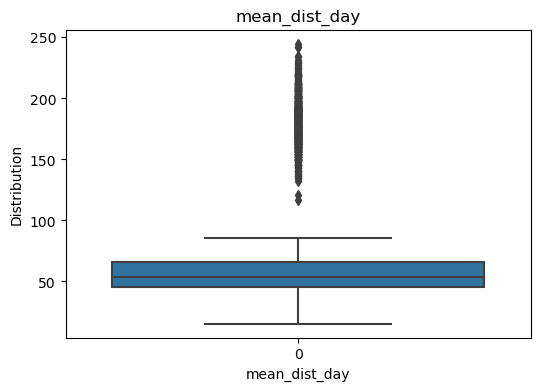

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(driver['mean_dist_day'])
plt.xlabel('mean_dist_day')
plt.ylabel('Distribution')
plt.title('mean_dist_day')
plt.show()

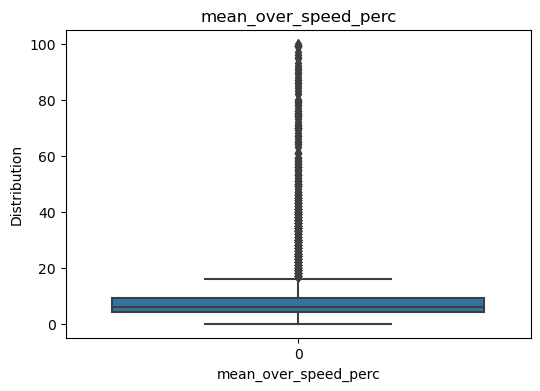

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(driver['mean_over_speed_perc'])
plt.xlabel('mean_over_speed_perc')
plt.ylabel('Distribution')
plt.title('mean_over_speed_perc')
plt.show()

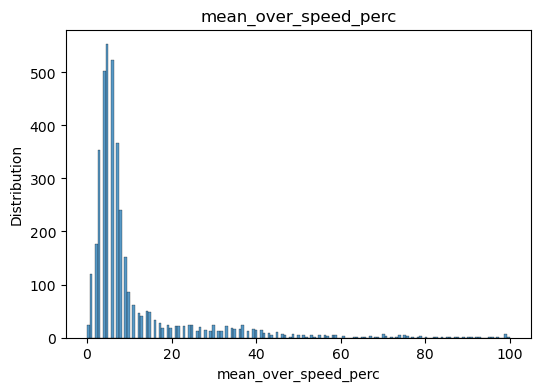

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(driver['mean_over_speed_perc'])
plt.xlabel('mean_over_speed_perc')
plt.ylabel('Distribution')
plt.title('mean_over_speed_perc')
plt.show()

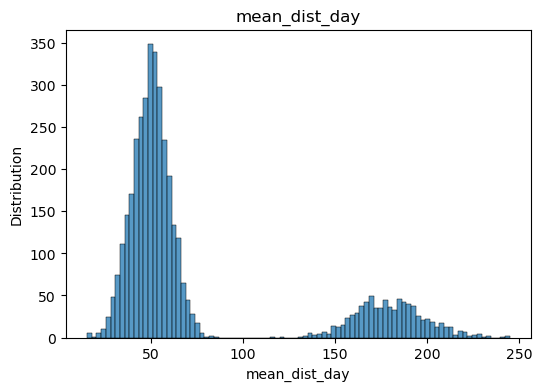

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(driver['mean_dist_day'])
plt.xlabel('mean_dist_day')
plt.ylabel('Distribution')
plt.title('mean_dist_day')
plt.show()

### Next actions
1. Scale (MINmax and Log-transform)
2. Clustering analysis Use the unscaled data too and compare result.

## MinMax scaler..

In [13]:
import sklearn.preprocessing as preproc

In [14]:
driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [15]:
driver["SC_mean_dist_day"]=preproc.minmax_scale(driver[["mean_dist_day"]])

In [16]:
driver["SC_mean_over_speed_perc"]=preproc.minmax_scale(driver[["mean_over_speed_perc"]])

## Log-Transform scaler..

In [17]:
driver["Log_mean_dist_day"]= np.log(driver["mean_dist_day"])

In [18]:
driver['Log_mean_over_speed_perc'] = np.log(driver['mean_over_speed_perc'])

In [19]:
driver.head()

,id,mean_dist_day,mean_over_speed_perc,SC_mean_dist_day,SC_mean_over_speed_perc,Log_mean_dist_day,Log_mean_over_speed_perc
0,3423311935,71.24,28,0.243032,0.28,4.266054,3.332205
1,3423313212,52.53,25,0.161425,0.25,3.961384,3.218876
2,3423313724,64.54,27,0.213809,0.27,4.167285,3.295837
3,3423311373,55.69,22,0.175208,0.22,4.019801,3.091042
4,3423310999,54.58,25,0.170367,0.25,3.999668,3.218876


driver = driver.drop(['Log_Rob_mean_dist_day'], axis= 1)

In [20]:
driver.head()

,id,mean_dist_day,mean_over_speed_perc,SC_mean_dist_day,SC_mean_over_speed_perc,Log_mean_dist_day,Log_mean_over_speed_perc
0,3423311935,71.24,28,0.243032,0.28,4.266054,3.332205
1,3423313212,52.53,25,0.161425,0.25,3.961384,3.218876
2,3423313724,64.54,27,0.213809,0.27,4.167285,3.295837
3,3423311373,55.69,22,0.175208,0.22,4.019801,3.091042
4,3423310999,54.58,25,0.170367,0.25,3.999668,3.218876


In [21]:
driver['SC_mosp']= driver['SC_mean_over_speed_perc']

In [22]:
driver['SC_mdd']=driver['SC_mean_dist_day']

In [23]:
driver['log_mosp']=driver['Log_mean_over_speed_perc']

In [24]:
driver['log_mdd']=driver['Log_mean_dist_day']

In [25]:
driver.head()

,id,mean_dist_day,mean_over_speed_perc,SC_mean_dist_day,SC_mean_over_speed_perc,Log_mean_dist_day,Log_mean_over_speed_perc,SC_mosp,SC_mdd,log_mosp,log_mdd
0,3423311935,71.24,28,0.243032,0.28,4.266054,3.332205,0.28,0.243032,3.332205,4.266054
1,3423313212,52.53,25,0.161425,0.25,3.961384,3.218876,0.25,0.161425,3.218876,3.961384
2,3423313724,64.54,27,0.213809,0.27,4.167285,3.295837,0.27,0.213809,3.295837,4.167285
3,3423311373,55.69,22,0.175208,0.22,4.019801,3.091042,0.22,0.175208,3.091042,4.019801
4,3423310999,54.58,25,0.170367,0.25,3.999668,3.218876,0.25,0.170367,3.218876,3.999668


In [26]:
driver.drop(['SC_mean_over_speed_perc','SC_mean_dist_day','Log_mean_over_speed_perc','Log_mean_dist_day'], axis = 1, inplace= True)

In [27]:
driver.head()

,id,mean_dist_day,mean_over_speed_perc,SC_mosp,SC_mdd,log_mosp,log_mdd
0,3423311935,71.24,28,0.28,0.243032,3.332205,4.266054
1,3423313212,52.53,25,0.25,0.161425,3.218876,3.961384
2,3423313724,64.54,27,0.27,0.213809,3.295837,4.167285
3,3423311373,55.69,22,0.22,0.175208,3.091042,4.019801
4,3423310999,54.58,25,0.25,0.170367,3.218876,3.999668


## Revisualised the numerical variables [MinMax] scaled.

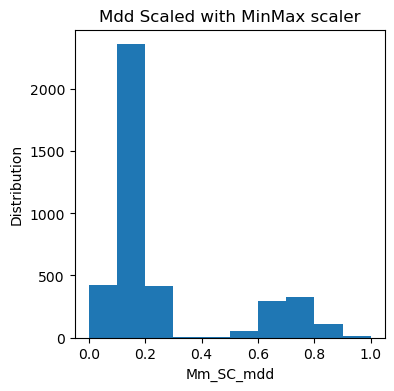

In [28]:
plt.figure(figsize=(4,4))
plt.hist(driver['SC_mdd'])
plt.xlabel('Mm_SC_mdd')
plt.ylabel('Distribution')
plt.title('Mdd Scaled with MinMax scaler')
plt.show()

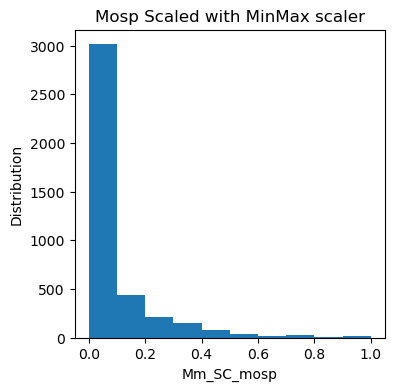

In [29]:
plt.figure(figsize=(4,4))
plt.hist(driver['SC_mosp'])
plt.xlabel('Mm_SC_mosp')
plt.ylabel('Distribution')
plt.title('Mosp Scaled with MinMax scaler')
plt.show()

## Revisualised the numerical variables [Log_transform] scaled.

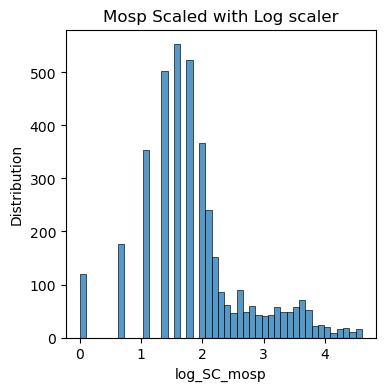

In [30]:
plt.figure(figsize=(4,4))
sns.histplot(driver['log_mosp'])
plt.xlabel('log_SC_mosp')
plt.ylabel('Distribution')
plt.title('Mosp Scaled with Log scaler')
plt.show()

## Clustering analysis

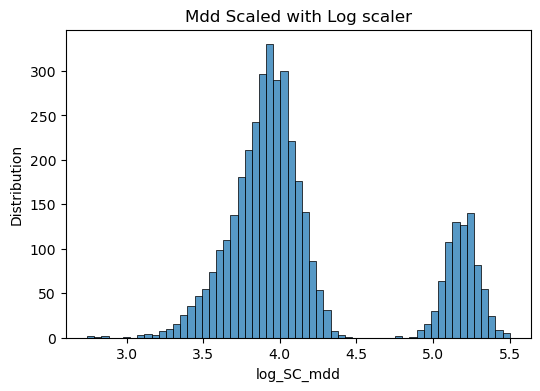

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(driver['log_mdd'])
plt.xlabel('log_SC_mdd')
plt.ylabel('Distribution')
plt.title('Mdd Scaled with Log scaler')
plt.show()

In [32]:
# Drop the column i dont need like the ID column 
driver.drop(['id'], axis= 1, inplace = True)

In [33]:
driver.head()

,mean_dist_day,mean_over_speed_perc,SC_mosp,SC_mdd,log_mosp,log_mdd
0,71.24,28,0.28,0.243032,3.332205,4.266054
1,52.53,25,0.25,0.161425,3.218876,3.961384
2,64.54,27,0.27,0.213809,3.295837,4.167285
3,55.69,22,0.22,0.175208,3.091042,4.019801
4,54.58,25,0.25,0.170367,3.218876,3.999668


In [34]:
# Declear 'x1' this are the unscaled data
x_1 = driver.iloc[:, [0, 1]].values

In [35]:
x_Max_2 = driver.iloc[:, [2, 3]].values

In [36]:
x_log_3 = driver.iloc[:, [4, 5]].values

In [37]:
x_1 # Normal data unscaled

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [38]:
x_Max_2 # Data scaled with MinMax scaler 

array([[0.28      , 0.24303223],
       [0.25      , 0.16142539],
       [0.27      , 0.21380905],
       ...,
       [0.12      , 0.67775985],
       [0.05      , 0.70057138],
       [0.09      , 0.66519824]])

In [39]:
x_log_3 # Data scaled with Log-transform

array([[3.33220451, 4.26605446],
       [3.21887582, 3.96138443],
       [3.29583687, 4.16728519],
       ...,
       [2.48490665, 5.1411371 ],
       [1.60943791, 5.17127913],
       [2.19722458, 5.12414253]])

In [40]:
x_log_3, x_Max_2, x_1.shape

(array([[3.33220451, 4.26605446],
        [3.21887582, 3.96138443],
        [3.29583687, 4.16728519],
        ...,
        [2.48490665, 5.1411371 ],
        [1.60943791, 5.17127913],
        [2.19722458, 5.12414253]]),
 array([[0.28      , 0.24303223],
        [0.25      , 0.16142539],
        [0.27      , 0.21380905],
        ...,
        [0.12      , 0.67775985],
        [0.05      , 0.70057138],
        [0.09      , 0.66519824]]),
 (4000, 2))

In [41]:
# Import model
from sklearn.cluster import KMeans

## Cluster for the Normal data [x_1]:
This is the data that was not scaled..

In [42]:
# Declear model for normal data
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 38)

# n_initial, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x_1)

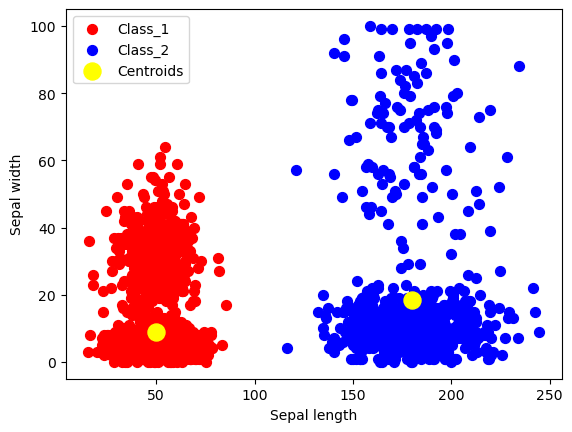

In [43]:
# Visualising the clusters using scatter() method
plt.scatter(x_1[y_kmeans == 0, 0], x_1[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Class_1')
plt.scatter(x_1[y_kmeans == 1, 0], x_1[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Class_2')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best") 

In [44]:
# Declear model for normal data
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

# n_initial, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x_1)

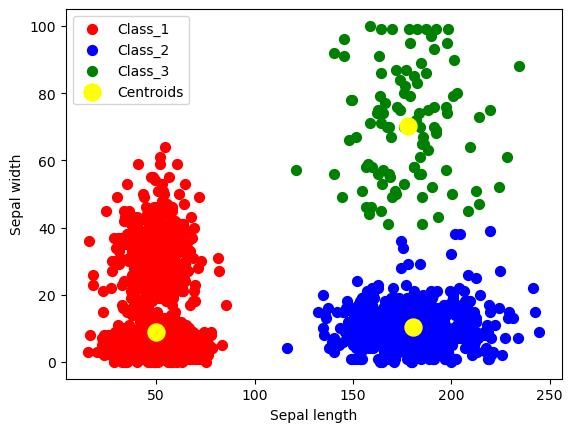

In [45]:
# Visualising the clusters using scatter() method
plt.scatter(x_1[y_kmeans == 0, 0], x_1[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Class_1')
plt.scatter(x_1[y_kmeans == 1, 0], x_1[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Class_2')
plt.scatter(x_1[y_kmeans == 2, 0], x_1[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Class_3')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best")

In [46]:
# Declear model for normal data
kmeans = KMeans(n_clusters = 4, max_iter = 300, n_init = 10, random_state = 38)

# n_initial, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x_1)

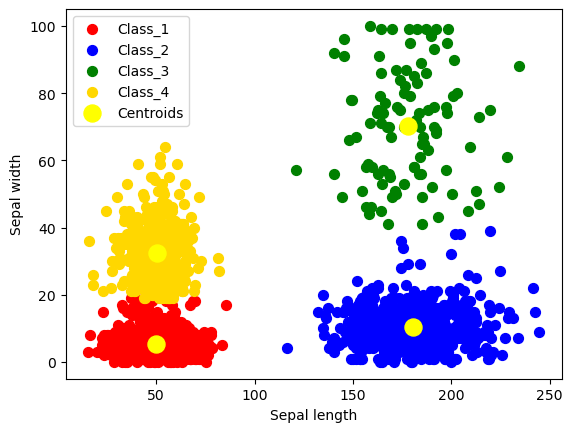

In [47]:
# Visualising the clusters using scatter() method
plt.scatter(x_1[y_kmeans == 0, 0], x_1[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Class_1')
plt.scatter(x_1[y_kmeans == 1, 0], x_1[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Class_2')
plt.scatter(x_1[y_kmeans == 2, 0], x_1[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Class_3')
plt.scatter(x_1[y_kmeans == 3, 0], x_1[y_kmeans == 3, 1], s = 50, c = 'Gold', label = 'Class_4')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best")

### Finding the the best number of cluster 

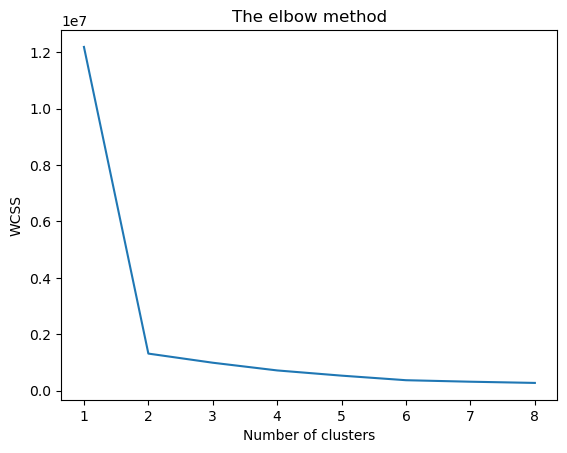

In [48]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)  # Initialise an object kmeans by calling 
                                                                                    # an object KMeans()
    kmeans.fit(x_1)                                                                   # Training the model by calling fit() method
    wcss.append(kmeans.inertia_)                                                    # Store kmeans.inertia_ in the array wcss
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 9), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()

In [49]:
# import KMeans library for clustering
from sklearn.cluster import KMeans

# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, max_iter = 300, n_init = 10, random_state = 38)

# n_initial, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x_1)

In [50]:
# import silhouette score from sklearn library
from sklearn.metrics import silhouette_score

# Display the silhouette score values
print(f'Silhouette Score(n = 2): {silhouette_score(x_1, y_kmeans)}')

Silhouette Score(n = 2): 0.8490223286225532


cluster     SC value
1. 2             0.8490223286225532
2. 3             0.8231396834167266
3. 4             0.5911323766293183
4. 5             0.5123566605258347

## Implementing the ideal cluster number

In [51]:
# Declear model for normal data
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

# n_initial, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x_1)

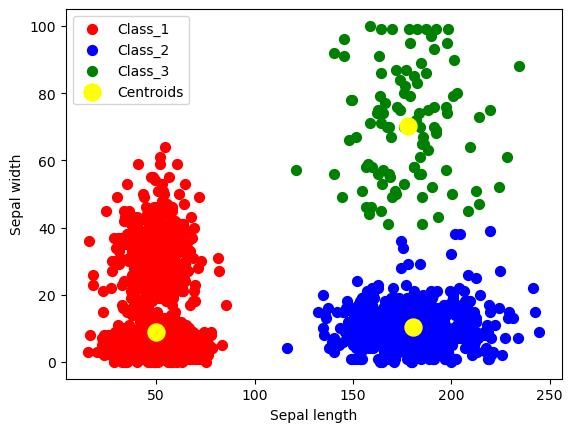

In [52]:
# Visualising the clusters using scatter() method
plt.scatter(x_1[y_kmeans == 0, 0], x_1[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Class_1')
plt.scatter(x_1[y_kmeans == 1, 0], x_1[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Class_2')
plt.scatter(x_1[y_kmeans == 2, 0], x_1[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Class_3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best")

## MinMax Data

In [53]:
# Declear model for normal data
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

# n_initial, default = 10, Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.
y_kmeans = kmeans.fit_predict(x_Max_2)

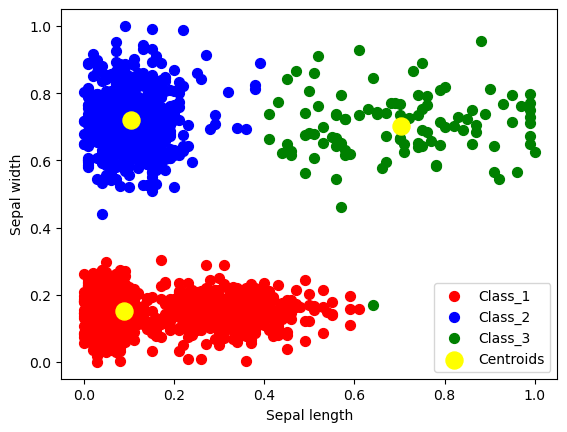

In [54]:
# Visualising the clusters using scatter() method
plt.scatter(x_Max_2[y_kmeans == 0, 0], x_Max_2[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Class_1')
plt.scatter(x_Max_2[y_kmeans == 1, 0], x_Max_2[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Class_2')
plt.scatter(x_Max_2[y_kmeans == 2, 0], x_Max_2[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Class_3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'yellow', label = 'Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# A legend is an area describing the elements of the graph. In the matplotlib library, there's a function called legend() 
# which is used to Place a legend on the axes.
plt.legend( loc ="best")